In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
%cd /content/drive/MyDrive/graduation_project/FPTT-on-ANN/RNN/lstm-master/new/
!pwd

/content/drive/MyDrive/graduation_project/FPTT-on-ANN/RNN/lstm-master/new
/content/drive/MyDrive/graduation_project/FPTT-on-ANN/RNN/lstm-master/new


In [3]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# import lstm as model
import lstm_no_b as model

In [4]:
!python lstm.py

# Load & Preprocess Data 

In [5]:
def LoadData(DirName,limit = 500):
    data = list();
    count = 0;
    with open(DirName) as f:
        for line in f:
            if count<limit:
                new_line = np.array(line.split(','))
                new_line = new_line.astype(np.float32)
                data.append(new_line)
                count += 1
    data = np.asarray(data)
    
    return data[:,0],data[:,1:]

NoTrain = 60000
NoTest = 10000
Y_train,x_train = LoadData("../lab1-solution/data/mnist_train.csv", NoTrain)
Y_test,x_test = LoadData("../lab1-solution/data/mnist_test.csv", NoTest)

print(f"Test set size: {x_test.shape[0]} x {x_test.shape[1]}")
print(f"Train set size: {x_train.shape[0]} x {x_train.shape[1]}")

Test set size: 10000 x 784
Train set size: 60000 x 784


In [6]:
x_train_st = (x_train-np.average(x_train))/np.std(x_train)
x_test_st = (x_test-np.average(x_train))/np.std(x_train)

In [7]:
# One-hot encoding train and test sets labels 
y_train = np.zeros((Y_train.size, int(Y_train.max()) + 1))
# y_train = np.zeros((Y_train.size, 10))
y_train[np.arange(Y_train.size),Y_train.astype(int)] = 1.0;

y_test  = np.zeros((Y_test.size, int(Y_test.max()) + 1))
# y_test  = np.zeros((Y_test.size, 10))
y_test[np.arange(Y_test.size),Y_test.astype(int)] = 1.0;

print(f"Your decimal label is {Y_train[0]:.0f} and your one-hot encoded label is {y_train[0,:]}")
print(f"Correct decimal label is 5 and correct one-hot encoded label is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]")

Your decimal label is 5 and your one-hot encoded label is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Correct decimal label is 5 and correct one-hot encoded label is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
X = x_train_st 
Y = y_train 

# Loss & Accuracy Definition

In [9]:
def cross_entropy(y_pred,y):
    """ Input Parameters: y_pred, y : array of float  Returns: c : float """
    
    # Compute loss
    c = ((-np.log(y_pred))*y).sum(axis=1).sum()

    print(y_pred, y, c)
    return c


def labeling(x):  
    # Set the label with the max probability to '1' and the rest to 0 
    label = np.zeros((x.shape[0],Y.shape[1]))
    label[np.arange(x.shape[0]),x.argmax(axis=1)] = 1
    return label

def accuracy(y_pred,y):  
    # Calculate the accuracy along the rows, averaging the results over the number of samples.
    acc = np.all(y_pred==y,axis=1).mean()
    return acc

# Instantiate Model

In [10]:
N_l = 128  # number of neurons in hidden layer

layers = np.array([1] +[N_l]+[Y.shape[1]]) # 
print(layers)

[  1 128  10]


In [11]:
np.random.seed(seed=0)

In [12]:
param = model.LstmParam(layers)

In [13]:
# def get_xt(p, step, T, inputs):
#     start = p*step
#     end = (p+1)*step
#     if (end >= T): end=T
        
#     x = inputs[ start : end ]
#     return x, start, end

In [14]:
seq_len = 784
k = 28 # p
step = seq_len / k


(60000, 784)


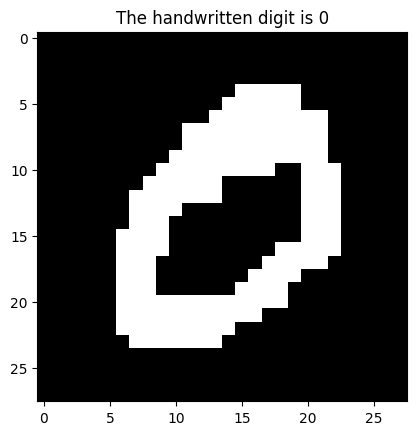

In [15]:
print(X.shape)
sample = 1;  # index of the image we want to show

plt.title(f'The handwritten digit is {Y_train[sample]:.0f}')

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = x_train[sample,:].reshape((28, 28))
plt.imshow(pixels, cmap='gray',vmin=0,vmax=1.0)
plt.show()

In [16]:
Model = model.Lstm(784, 200, layers, param)

for t in range(784):
    Model.state.forward(t, X[0:200, t:(t+1)] )
    # if t== (200||400||):
    #     print(t, Model.state.Y_hat[t])
print(600, Model.state.Y_hat[600])
print(783, Model.state.Y_hat[783])

600 [[0.09866299 0.10135393 0.09945475 ... 0.1000693  0.09967434 0.10139287]
 [0.09879626 0.10154654 0.09936927 ... 0.10005524 0.09941178 0.10164324]
 [0.10020738 0.09979338 0.10013594 ... 0.09997564 0.10005878 0.09974575]
 ...
 [0.09918113 0.10078144 0.0996711  ... 0.10006191 0.09984568 0.10081405]
 [0.0986673  0.10135401 0.09945376 ... 0.10006923 0.09967084 0.10139359]
 [0.10020734 0.09979342 0.10013592 ... 0.09997566 0.10005878 0.09974574]]
783 [[0.10020734 0.09979343 0.10013592 ... 0.09997566 0.10005878 0.09974574]
 [0.10020734 0.09979343 0.10013592 ... 0.09997566 0.10005878 0.09974574]
 [0.10020734 0.09979343 0.10013592 ... 0.09997566 0.10005878 0.09974574]
 ...
 [0.10020734 0.09979343 0.10013592 ... 0.09997566 0.10005878 0.09974574]
 [0.10020734 0.09979343 0.10013592 ... 0.09997566 0.10005878 0.09974574]
 [0.10020734 0.09979343 0.10013592 ... 0.09997566 0.10005878 0.09974574]]


In [44]:
print(Model.param.l1_wf)

[[ 0.00862909  0.03804047  0.01816617 ... -0.08499544 -0.03507695
   0.02831495]
 [-0.03710939  0.02086238 -0.01259203 ... -0.07364121  0.00922641
   0.0149334 ]
 [ 0.08165959 -0.03674347 -0.04581543 ...  0.05670415  0.07227404
   0.05577726]
 ...
 [-0.02938182 -0.03493803 -0.07455167 ... -0.07899544 -0.0076339
   0.06084169]
 [ 0.08658275 -0.07437803 -0.07302671 ... -0.02045291 -0.08632061
   0.059842  ]
 [-0.02951533  0.06813321  0.03719318 ... -0.016658    0.0133768
  -0.03443887]]


In [45]:
mean_train_loss_list = list()
train_acc_list = list()


# Initialize the batch size, the number of epochs, and the learning rate
n_samples = 10 #X.shape[0]

batch_size = 2
epochs = 200
lr = 0.01
alpha = 0.1

# Initialize the weights
# weights = init_weights(layers)
# w_g, w_lbd, w_rm = init_weights_derivatives(layers, weights)

# Q: predicted label distribution of last training epoch --> used to make auxiliary loss (oracle loss)
Q = np.zeros_like(Y)

target = np.zeros((batch_size, 10))


# Epoch for loop
for epoch in range(epochs):

    if (epoch==50) or (epoch==75) or (epoch==90):
        lr *= 0.1

    # Initialize the layers
    # ins, h, o = init_layer(layers,batch_size)
    # initiate hidden states for current batch
    Model = model.Lstm(seq_len, batch_size, layers, param)
   
    # Initialize the training loss and accuracy for each epoch
    train_loss = 0
    train_acc = 0

    # Create a random permutation for shuffling
    shuffle = np.random.permutation(n_samples)
    print(shuffle)


    # Shuffle dataset and create mini-batches for each epoch
    X_batches = np.array_split(X[shuffle],n_samples/batch_size)
    Y_batches = np.array_split(Y[shuffle],n_samples/batch_size)
    Q_batches = np.array_split(Q[shuffle],n_samples/batch_size)
    target = np.empty_like(Q_batches)

    # print(Y_batches)

    # Mini-batch for loop
    for b in range(int(n_samples/batch_size)):

        for p in range(28):

            for t in range (28):
                cnt = p*28 + t            
                Model.state.forward(cnt, X_batches[b][:, cnt:(cnt+1)] )
            # print(cnt, Model.state.Y_hat[cnt])

            # to make target for cross entropy and divergence term 
            if epoch == 0:
                beta = 1
            else:
                beta = (cnt+1)/seq_len 
            
            target[b] = beta*(Y_batches[b]) + (1-beta)*Q_batches[b]

            # backwards - to calculate the gradients w.r.t. cross entropy loss and auxiliary loss
            Model.backward(cnt, target[b], trunc_h=27, trunc_s=27)

            # update the weights by gradients obtained
            Model.param.apply_diff_fptt(lr, alpha)


        Q[shuffle[batch_size*b:batch_size*(b+1)]] = Q_batches[b]

        train_loss += cross_entropy(Model.state.Y_hat[seq_len-1],Y_batches[b])
        train_acc += accuracy(labeling(Model.state.Y_hat[seq_len-1]),Y_batches[b])       


    mean_train_loss = train_loss/n_samples
    mean_train_loss_list.append(mean_train_loss)
    train_acc = (train_acc/len(X_batches))
    train_acc_list.append(train_acc)




    print(f"Epoch {epoch+1}: train_loss = {mean_train_loss:.3f} | train_acc = {train_acc:.3f} " )



[5 2 3 4 1 0 9 8 7 6]
[[0.10337754 0.09988921 0.10038095 0.09997839 0.09859343 0.0994251
  0.0988906  0.10030227 0.10016156 0.09900096]
 [0.10337754 0.09988921 0.10038095 0.09997839 0.09859343 0.0994251
  0.0988906  0.10030227 0.10016156 0.09900096]] [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] 4.6155334815365805
[[0.10317011 0.10009999 0.10034874 0.0999635  0.09866019 0.09944889
  0.09894577 0.10026953 0.10014239 0.0989509 ]
 [0.10317011 0.10009999 0.10034874 0.0999635  0.09866019 0.09944889
  0.09894577 0.10026953 0.10014239 0.0989509 ]] [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] 4.6147172063514486
[[0.10403065 0.09997792 0.10021066 0.09984738 0.09862574 0.09939908
  0.09889611 0.10012184 0.09998571 0.09890491]
 [0.10403065 0.09997792 0.10021066 0.09984738 0.09862574 0.09939908
  0.09889611 0.10012184 0.09998571 0.09890491]] [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]] 4.571682129405982
[[0.10384036 0.1002307  0.1001

KeyboardInterrupt: ignored

In [ ]:
# mean_train_loss_list = list()
# train_acc_list = list()


# # Initialize the batch size, the number of epochs, and the learning rate
# n_samples = 1 #X.shape[0]

# batch_size = 1
# epochs = 10 #200
# lr = 0.01
# alpha = 0.1

# # Initialize the weights
# # weights = init_weights(layers)
# # w_g, w_lbd, w_rm = init_weights_derivatives(layers, weights)

# # Q: predicted label distribution of last training epoch --> used to make auxiliary loss (oracle loss)
# Q = np.zeros_like(Y)

# target = np.zeros((batch_size, 10))


# # Epoch for loop
# for epoch in range(epochs):

#     if (epoch==50) or (epoch==90) or (epoch==120):
#         lr *= 0.1

#     # Initialize the layers
#     # ins, h, o = init_layer(layers,batch_size)
#     # initiate hidden states for current batch
#     Model = model.Lstm(seq_len, batch_size, layers, param)
   
#     # Initialize the training loss and accuracy for each epoch
#     train_loss = 0
#     train_acc = 0

#     # Create a random permutation for shuffling
#     shuffle = np.random.permutation(n_samples)
#     print(shuffle)


#     # Shuffle dataset and create mini-batches for each epoch
#     X_batches = np.array_split(X[shuffle],n_samples/batch_size)
#     Y_batches = np.array_split(Y[shuffle],n_samples/batch_size)
#     Q_batches = np.array_split(Q[shuffle],n_samples/batch_size)
#     target = np.empty_like(Q_batches)

#     print(Y_batches)

#     # Mini-batch for loop
#     for b in range(int(n_samples/batch_size)):

#         for t in range (784):          
#             Model.state.forward(t, X_batches[b][:, t:(t+1)] )

#         # to make target for cross entropy and divergence term 
#         # beta = (cnt+1)/seq_len 
#         # target[b] = beta*(Y_batches[b]) + (1-beta)*Q_batches[b]

#         # backwards - to calculate the gradients w.r.t. cross entropy loss and auxiliary loss
#         Model.backward(t, target[b])

#         # update the weights by gradients obtained
#         # Model.param.apply_diff_fptt(lr, alpha)
#         Model.param.apply_diff(lr)

#         # Q[shuffle[batch_size*b:batch_size*(b+1)]] = Q_batches[b]

#         train_loss += cross_entropy(Model.state.Y_hat[seq_len-1],Y_batches[b])
#         train_acc += accuracy(labeling(Model.state.Y_hat[seq_len-1]),Y_batches[b])       


#     mean_train_loss = train_loss/n_samples
#     mean_train_loss_list.append(mean_train_loss)
#     train_acc = (train_acc/len(X_batches))
#     train_acc_list.append(train_acc)




    # print(f"Epoch {epoch+1}: train_loss = {mean_train_loss:.3f} | train_acc = {train_acc:.3f} " )



In [ ]:
# mean_train_loss_list = list()
# train_acc_list = list()


# # Initialize the batch size, the number of epochs, and the learning rate
# n_samples = 2 #X.shape[0]

# batch_size = 1
# epochs = 200
# lr = 0.01
# alpha = 0.1

# # Initialize the weights
# # weights = init_weights(layers)
# # w_g, w_lbd, w_rm = init_weights_derivatives(layers, weights)

# # Q: predicted label distribution of last training epoch --> used to make auxiliary loss (oracle loss)
# Q = np.zeros_like(Y)

# target = np.zeros((batch_size, 10))


# # Epoch for loop
# for epoch in range(epochs):

#     # if (epoch==60) or (epoch==90) or (epoch==120):
#         # lr *= 0.5

#     # Initialize the layers
#     # ins, h, o = init_layer(layers,batch_size)
#     # initiate hidden states for current batch
#     Model = model.Lstm(seq_len, batch_size, layers, param)
   
#     # Initialize the training loss and accuracy for each epoch
#     train_loss = 0
#     train_acc = 0

#     # Create a random permutation for shuffling
#     shuffle = np.random.permutation(n_samples)
#     # print(shuffle[0])


#     # Shuffle dataset and create mini-batches for each epoch
#     X_batches = np.array_split(X[shuffle],n_samples/batch_size)
#     Y_batches = np.array_split(Y[shuffle],n_samples/batch_size)
#     Q_batches = np.array_split(Q[shuffle],n_samples/batch_size)
#     target = np.empty_like(Q_batches)

 

#     # Mini-batch for loop
#     for b in range(int(n_samples/batch_size)):

#         for t in range(seq_len):
            
#             Model.state.forward(t, X_batches[b][:,t:t+1])

#             # to make target for cross entropy and divergence term 
#             beta = (t+1)/seq_len 
#             target[b] = beta*(Y_batches[b]) + (1-beta)*Q_batches[b]

#             # backwards - to calculate the gradients w.r.t. cross entropy loss and auxiliary loss
#             Model.backward(t, target[b], trunc_h=0, trunc_s=0)

#             # update the weights by gradients obtained
#             Model.param.apply_diff_fptt(lr, alpha)


#         Q[shuffle[batch_size*b:batch_size*(b+1)]] = Q_batches[b]

#         train_loss += cross_entropy(Model.state.Y_hat[seq_len-1],Y_batches[b])
#         train_acc += accuracy(labeling(Model.state.Y_hat[seq_len-1]),Y_batches[b])       


#     mean_train_loss = train_loss/n_samples
#     mean_train_loss_list.append(mean_train_loss)
#     train_acc = (train_acc/len(X_batches))
#     train_acc_list.append(train_acc)




#     print(f"Epoch {epoch+1}: train_loss = {mean_train_loss:.3f} | train_acc = {train_acc:.3f} " )



In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(mean_train_loss_list,label="Train loss")
# ax[0].plot(mean_test_loss_list,label="Test loss")
ax[0].legend()
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].grid()

ax[1].plot(train_acc_list,label="Train accuracy")
# ax[1].plot(test_acc_list,label="Test accuracy")
ax[1].legend()
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].grid()